In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder


import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/mushrooms.csv")

In [5]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


# Checking null values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [7]:
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

# Checking categories in different features

In [8]:
df.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

# using encoding technique

In [9]:
label=LabelEncoder()
for i in df:
    df[i]=label.fit_transform(df[i])

In [10]:
df.drop(columns='veil-type',inplace=True,axis=1)#as per my obs i noted the category of all the data in the feature is of same category so i can drop it

# checking corr with label

<function matplotlib.pyplot.show>

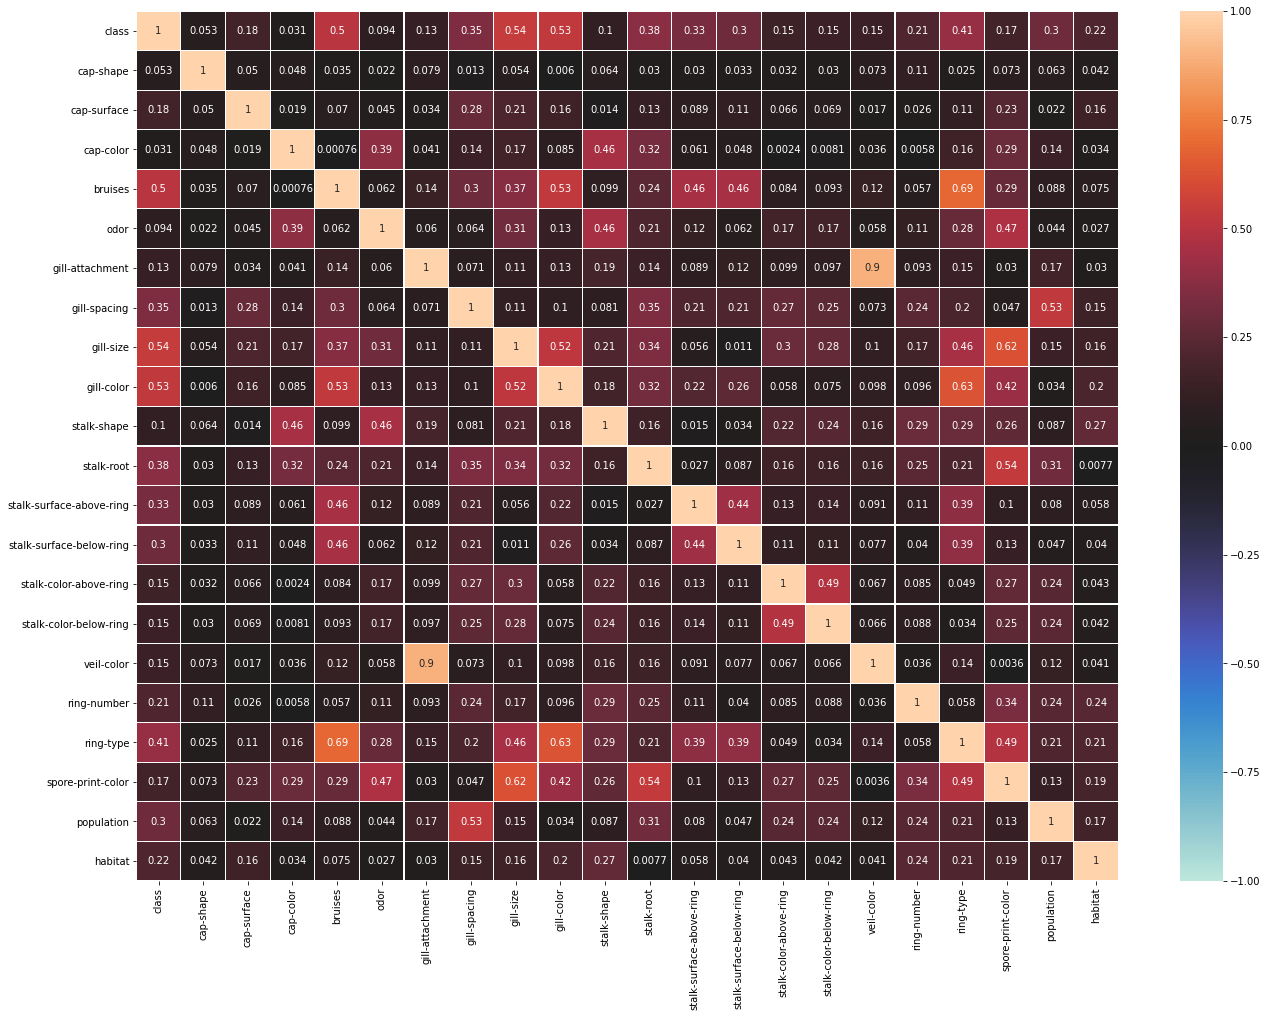

In [11]:
df_corr=df.corr().abs()
plt.figure(figsize=(22,16))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,center=0,fmt=".2g",linewidths=.2)
plt.show

In [12]:
df.skew()

class                       0.071946
cap-shape                  -0.247052
cap-surface                -0.590859
cap-color                   0.706965
bruises                     0.342750
odor                       -0.080790
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                  0.061410
stalk-shape                -0.271345
stalk-root                  0.947852
stalk-surface-above-ring   -1.098739
stalk-surface-below-ring   -0.757703
stalk-color-above-ring     -1.835434
stalk-color-below-ring     -1.791593
veil-color                 -6.946944
ring-number                 2.701657
ring-type                  -0.290018
spore-print-color           0.548426
population                 -1.413096
habitat                     0.985548
dtype: float64

# Balanced dataset

In [13]:
df['class'].value_counts()

0    4208
1    3916
Name: class, dtype: int64

In [14]:
y=df['class']
x=df.drop('class',axis=1)

# scaling dataset

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [16]:
x_scaled = scaler.fit_transform(x)

# creating model for dataset

In [17]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.30,random_state=255)

In [19]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
y_pred=lr.predict(x_test)

In [21]:
print("Classification report :\n",classification_report(y_test,y_pred))

Classification report :
               precision    recall  f1-score   support

           0       0.95      0.96      0.96      1290
           1       0.96      0.95      0.95      1148

    accuracy                           0.95      2438
   macro avg       0.95      0.95      0.95      2438
weighted avg       0.95      0.95      0.95      2438



In [22]:
print(cross_val_score(lr,x_scaled,y,cv=5).mean())

0.8301065555134521


In [23]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [24]:
y_pred=knn.predict(x_test)

In [25]:
print("Classification report :\n",classification_report(y_test,y_pred))

Classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1290
           1       1.00      1.00      1.00      1148

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [26]:
print(cross_val_score(knn,x_scaled,y,cv=5).mean())

0.8797053429329292


In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
dt = DecisionTreeClassifier()

In [29]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [30]:
y_pre=dt.predict(x_test)

In [31]:
print("Classification report :\n",classification_report(y_test,y_pre))

Classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1290
           1       1.00      1.00      1.00      1148

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [32]:
print(cross_val_score(dt,x_scaled,y,cv=5).mean())

0.9251377036756347


In [33]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [34]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [35]:
knn.score(x_train,y_train)

0.9998241294407316

In [36]:
knn.score(x_test,y_test)

0.9995898277276456

In [37]:
bag_knn = BaggingClassifier()

In [38]:
bag_knn.fit(x_train,y_train)
bag_knn.score(x_test,y_test)

1.0

In [39]:
y_pre= bag_knn.predict(x_test)

In [40]:
print("Classification report :\n",classification_report(y_test,y_pre))

Classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1290
           1       1.00      1.00      1.00      1148

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [41]:
print(cross_val_score(bag_knn,x_scaled,y,cv=5).mean())

0.909750056839712


# decision tree classifier is my best model and i am going to tune it

In [46]:
grid_params= {
    'criterion':['gini','entropy'],
    'max_depth':range(1,20),
    'min_samples_leaf':range(1,50,2),
    'min_samples_split':range(1,50,2),
    'random_state':range(0,20,2)
}

In [49]:
grid_search = GridSearchCV(estimator = dt,
                          param_grid = grid_params,
                          cv=3,n_jobs=-1)

In [50]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [51]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'random_state': 0}

In [62]:
dt= DecisionTreeClassifier(criterion = 'gini',max_depth =8 , min_samples_leaf=1,min_samples_split =3,random_state=0)
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [63]:
y_pred=dt.predict(x_test)

In [64]:
accuracy_score(y_test,y_pred)

1.0

In [66]:
print(cross_val_score(dt,x_scaled,y,cv=5).mean())

0.9251377036756347


# saving dataset

In [69]:
import pickle
filename='mushroom.pk1'
pickle.dump(dt,open(filename,'wb'))